# Student Performance Dataset

## 1. Analyze the Big Picture 

The first step is to understand the purpose of our project. In this case, we want to predict students' performance in mathematics based on characteristics such as social environment, parents' education, study time, among other factors.

Our goal is to build a machine learning model capable of predicting a student's first-term grade (`G1`) based on their attributes.

The dataset is available at the following link: https://archive.ics.uci.edu/dataset/320/student+performance

## 2. Obtain the Data

Let's load the dataset and check the first few lines to ensure the data is correct.

In [1]:
#Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data = pd.read_csv('student-mat.csv', sep=';')

# Display the first few lines
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 3. Data Exploration and Visualization

 Before training a model, it's important to explore and visualize the data to find patterns or inconsistencies. Let's check the general statistics and make some visualizations.

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

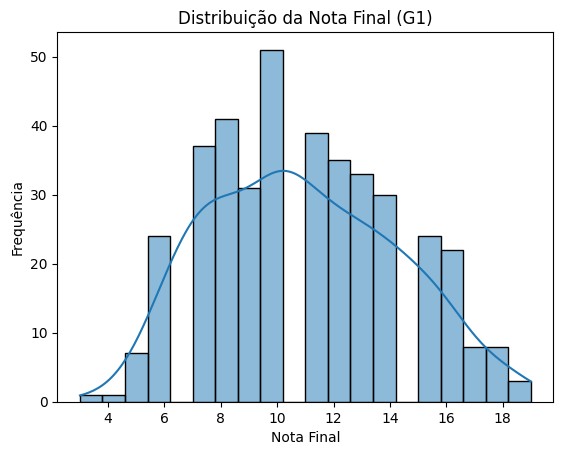

In [3]:
# General statistics
print(data.describe())

# Visualizing the distribution of the target variable (G1)

sns.histplot(data['G1'], kde=True, bins=20)
plt.title('Distribuição da Nota Final (G1)')
plt.xlabel('Nota Final')
plt.ylabel('Frequência')
plt.show()

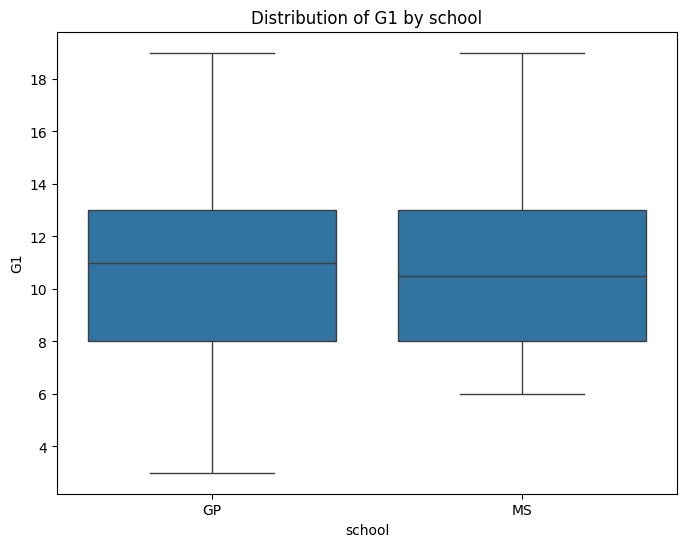

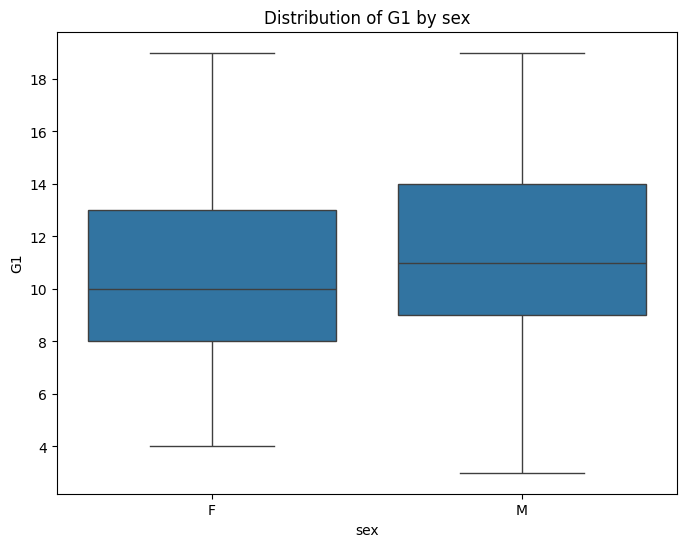

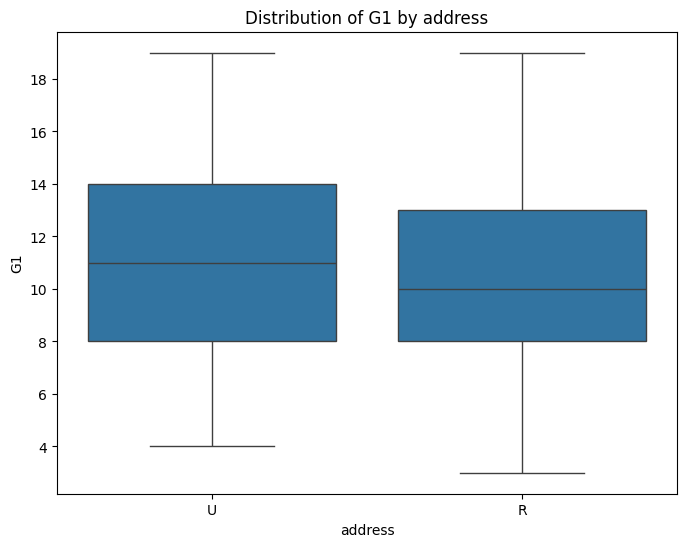

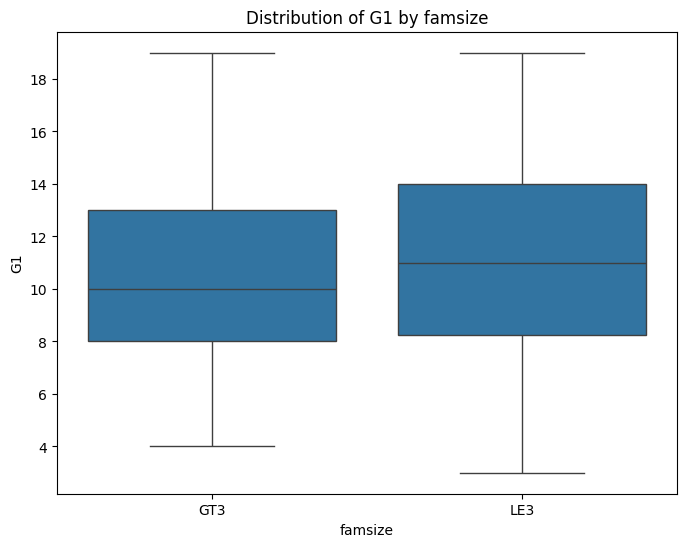

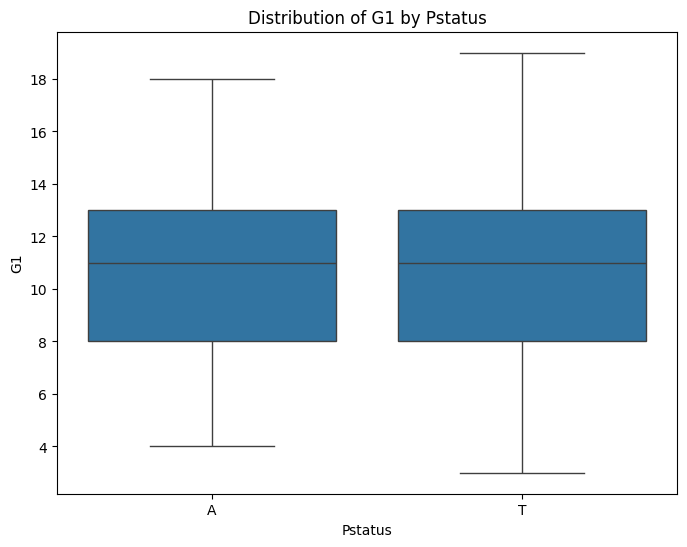

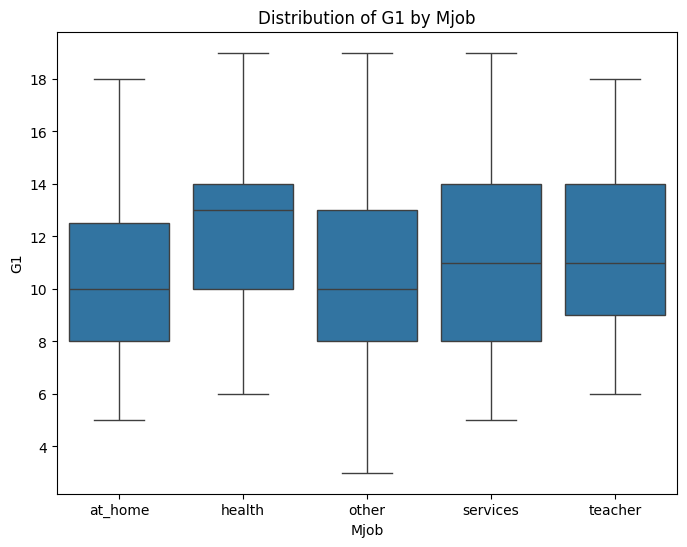

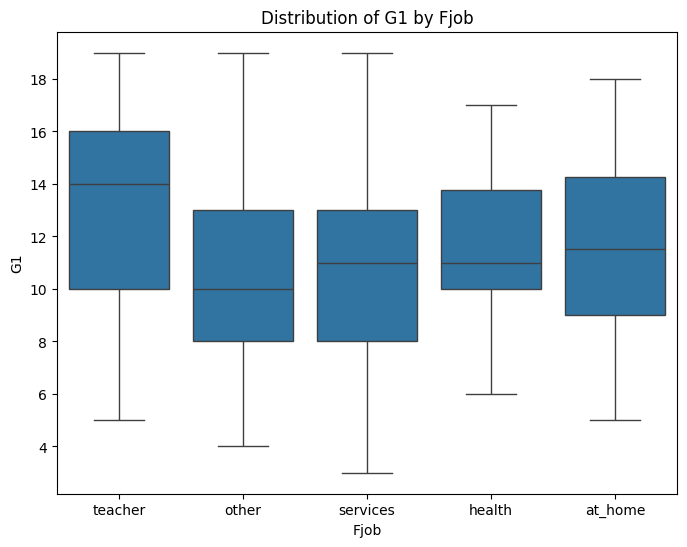

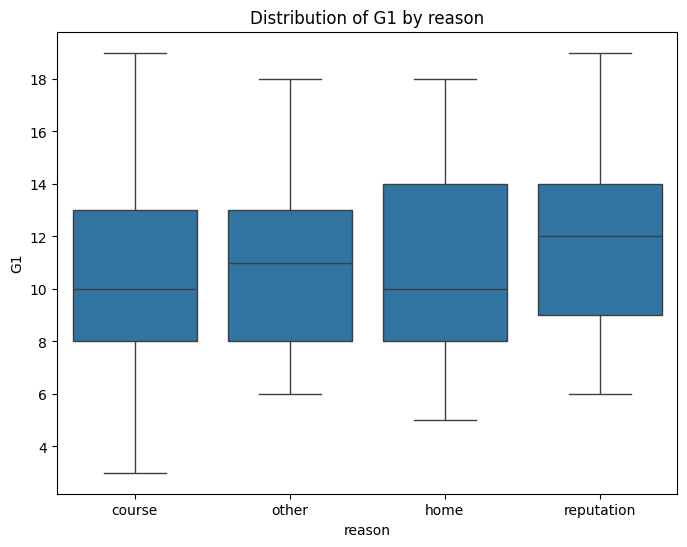

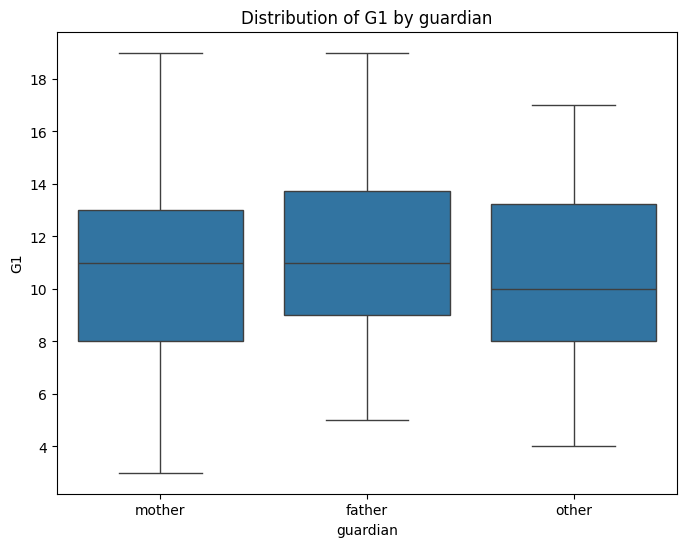

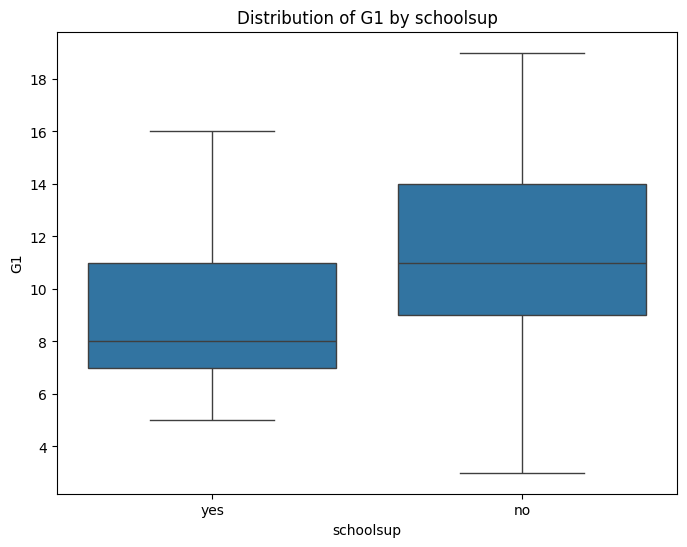

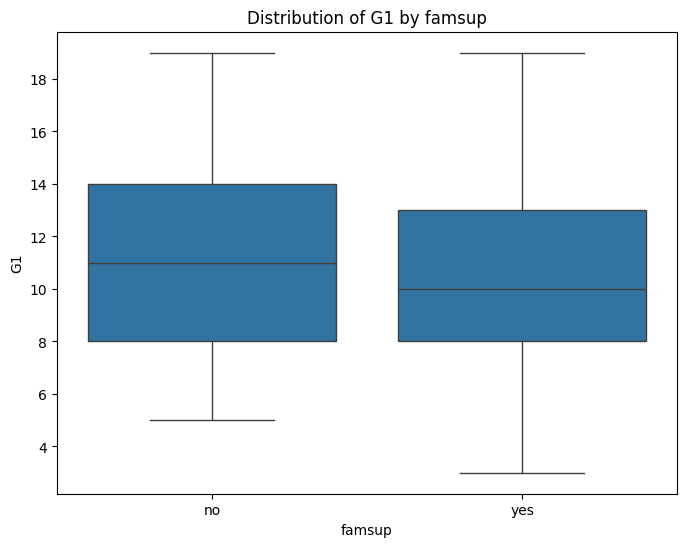

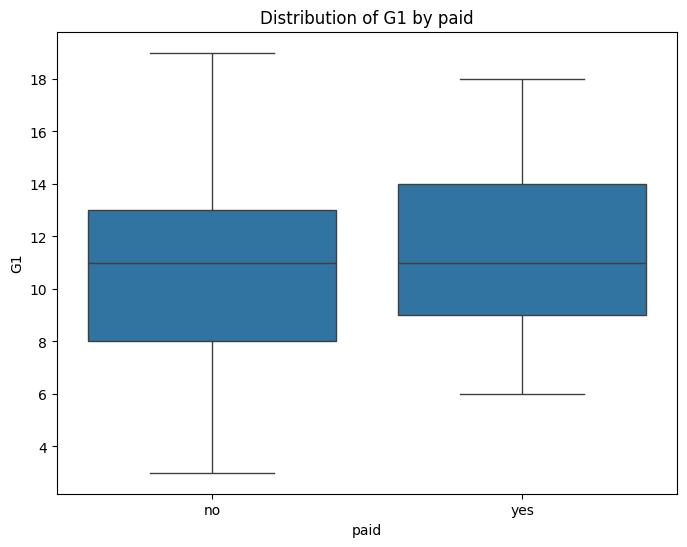

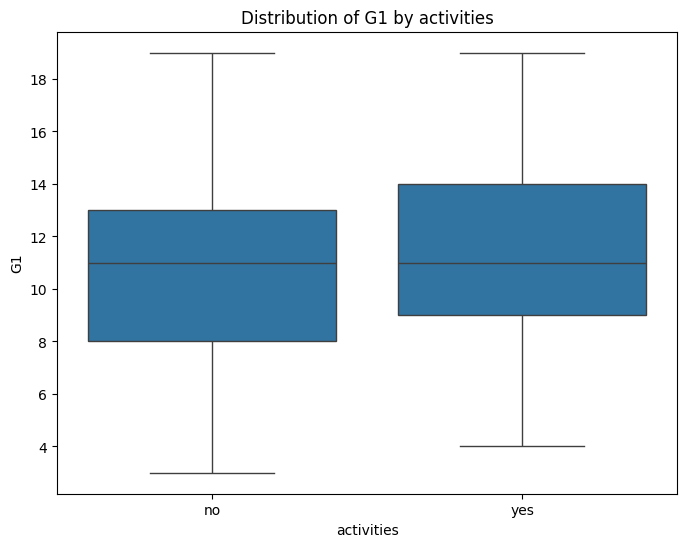

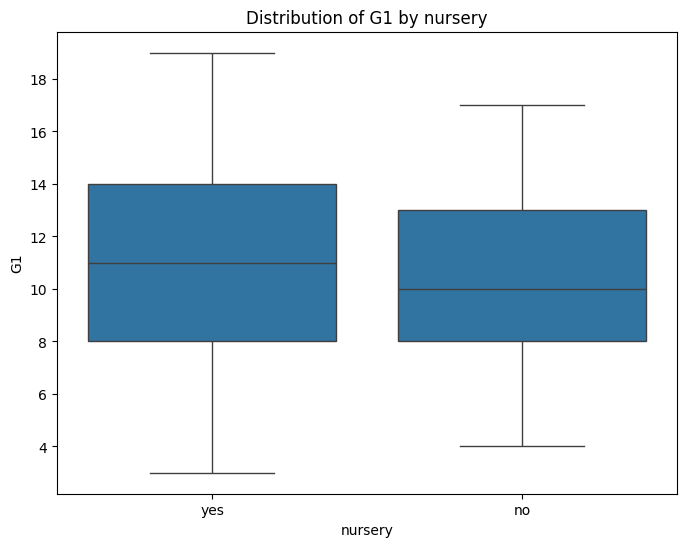

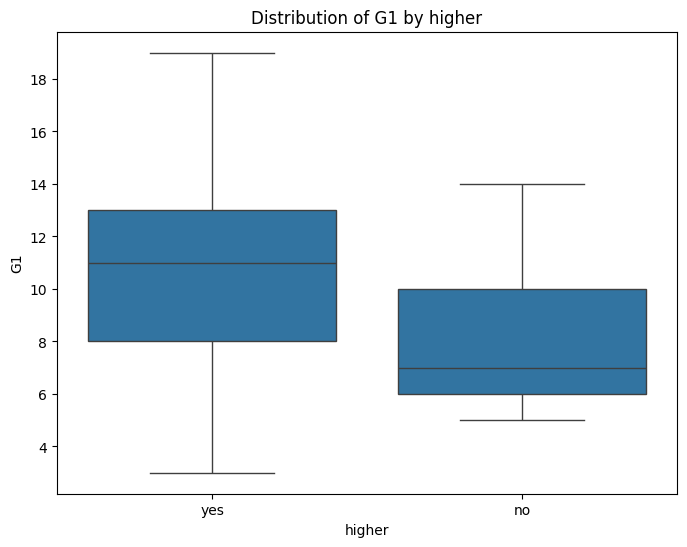

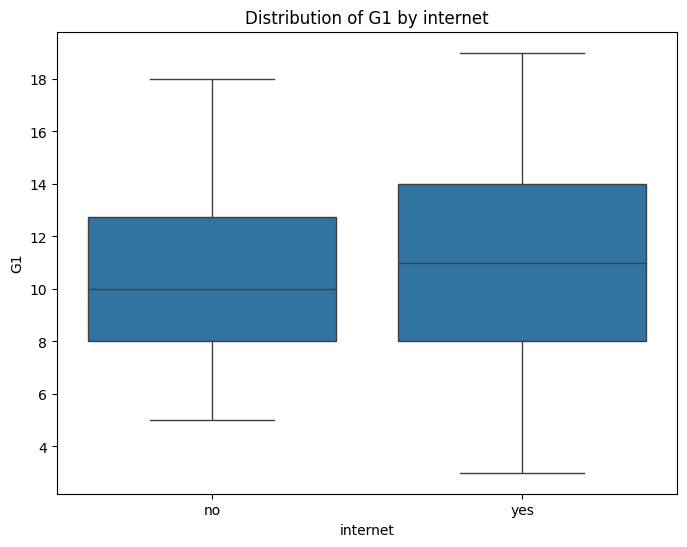

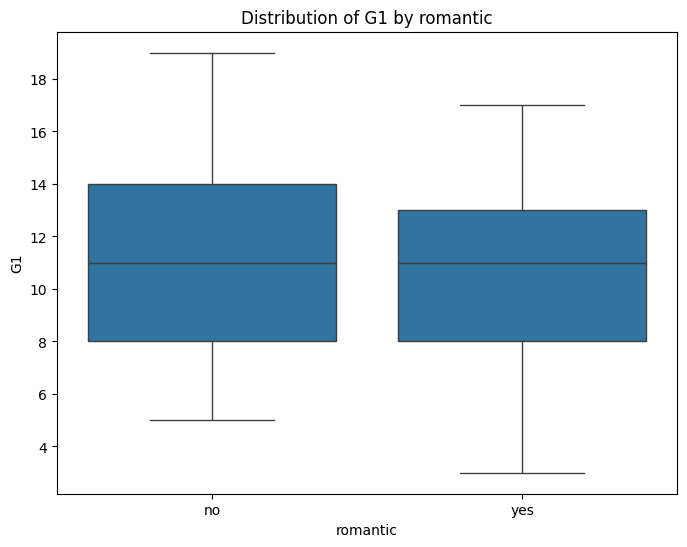

In [4]:
# Identifying categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    # Create a boxplot to visualize the distribution of grades ('G1') across different categories of the column
    sns.boxplot(x=data[col], y=data['G1'])
    plt.title(f'Distribution of G1 by {col}')
    plt.xlabel(col)
    plt.ylabel('G1')
    plt.show()


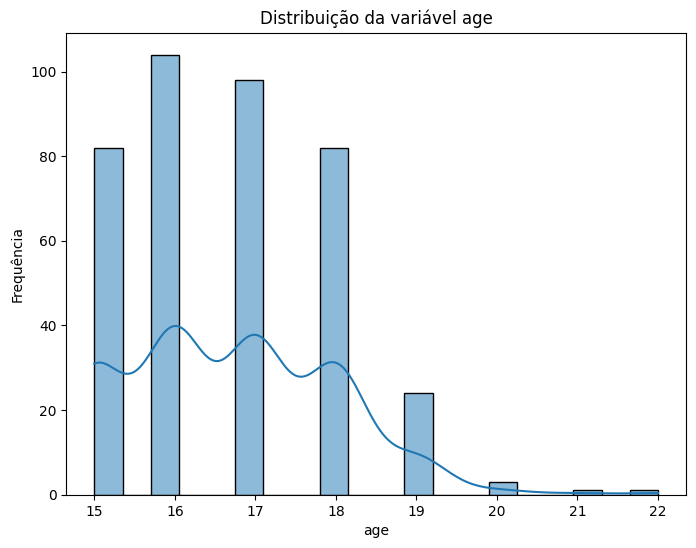

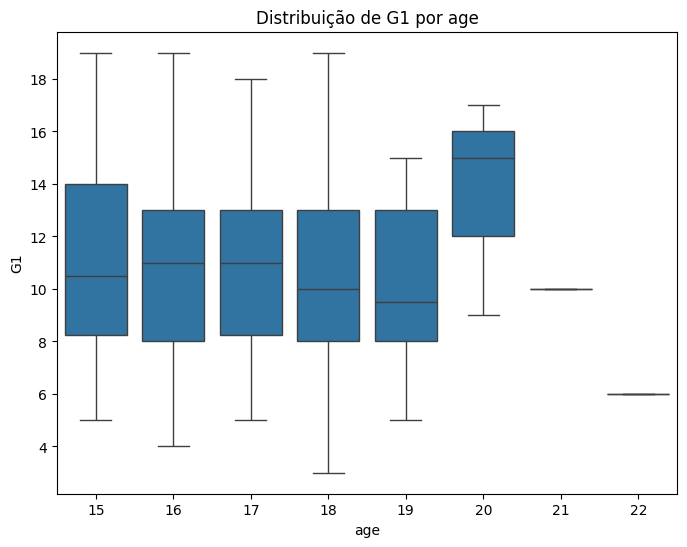

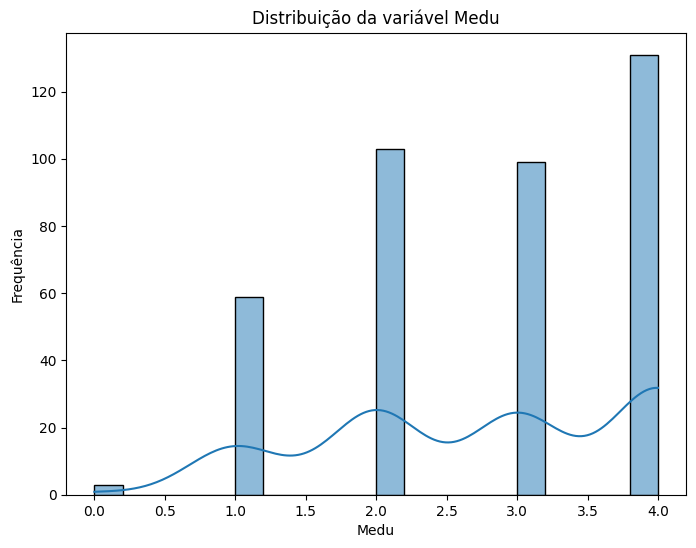

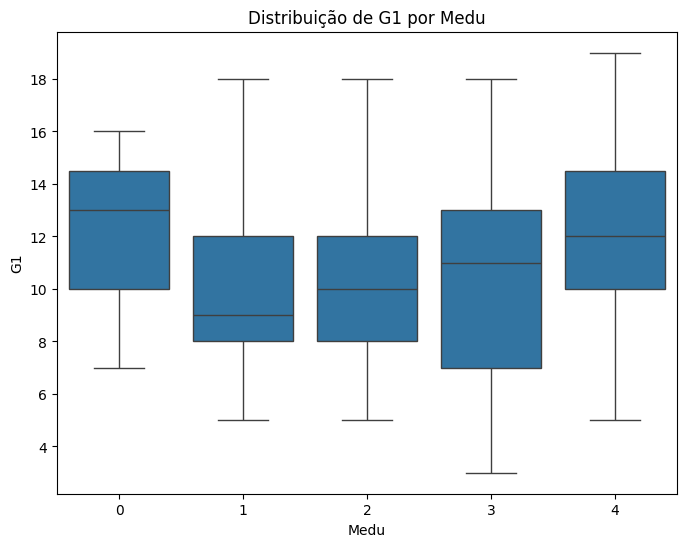

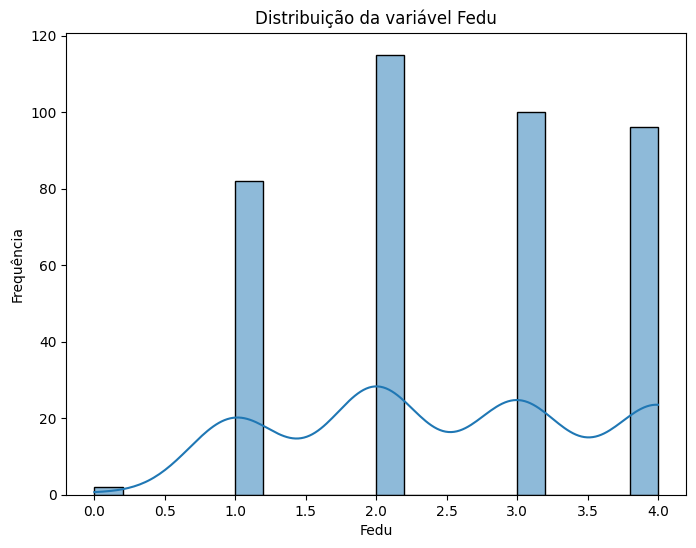

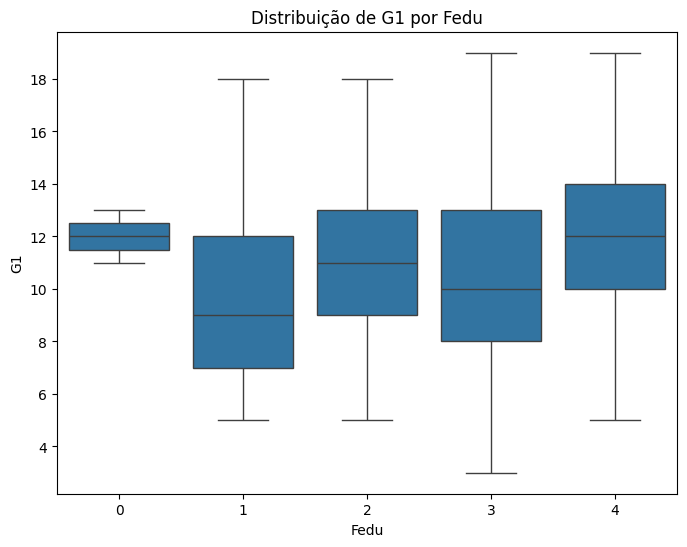

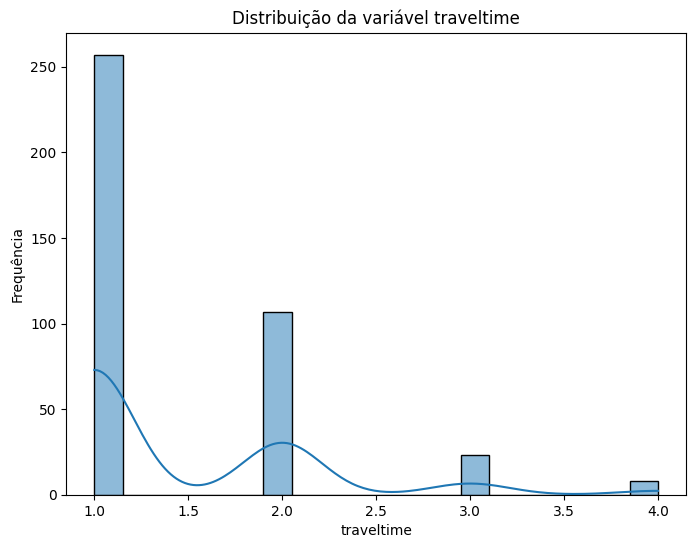

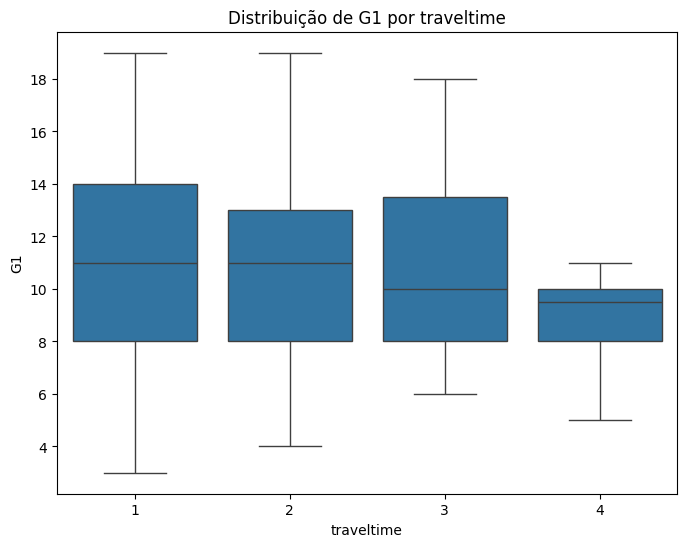

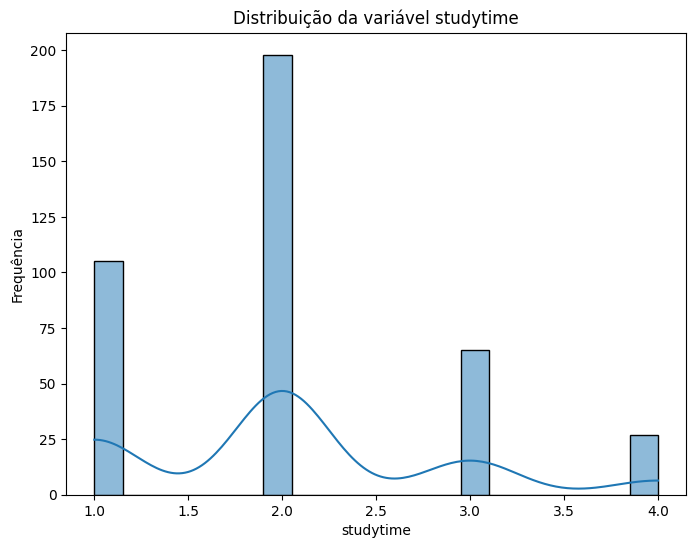

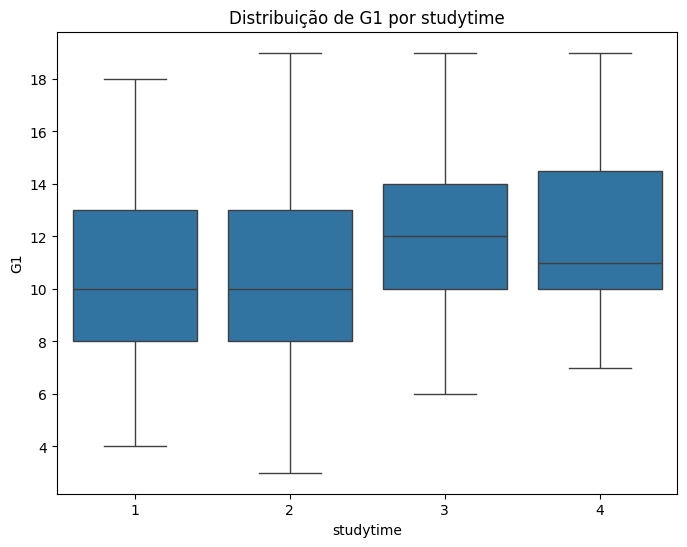

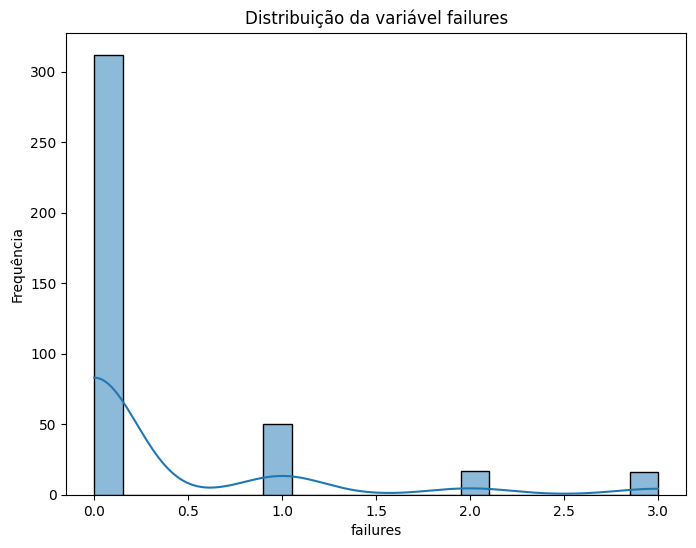

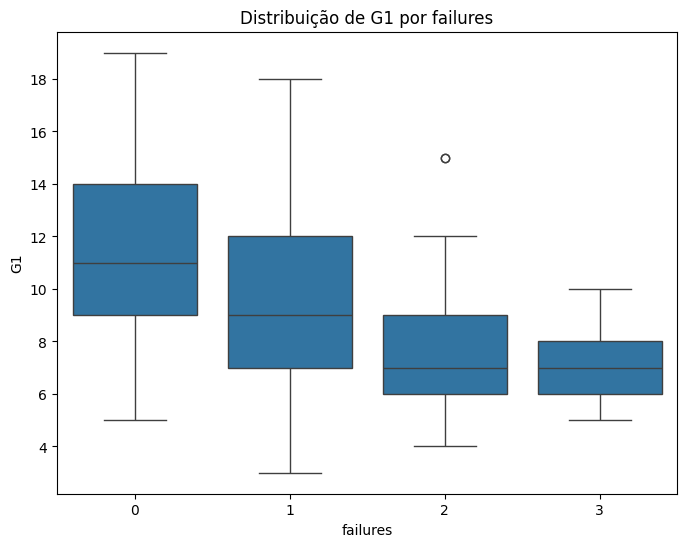

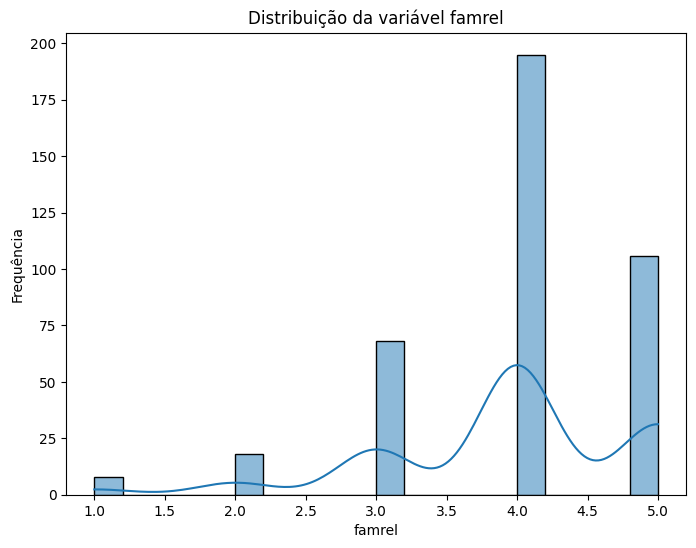

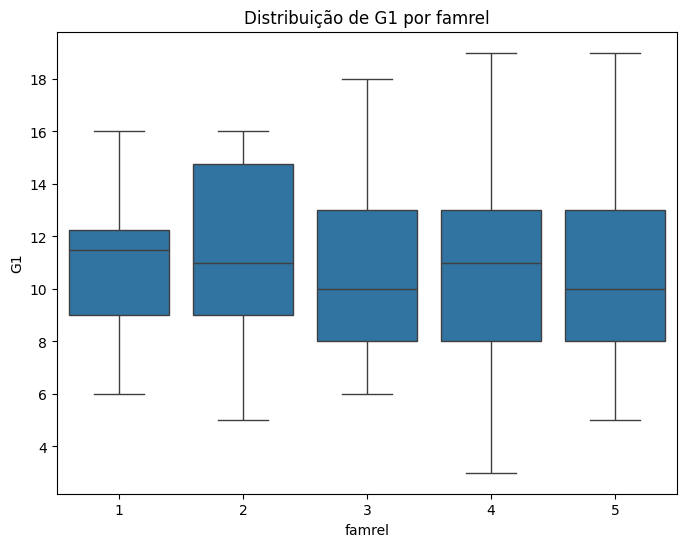

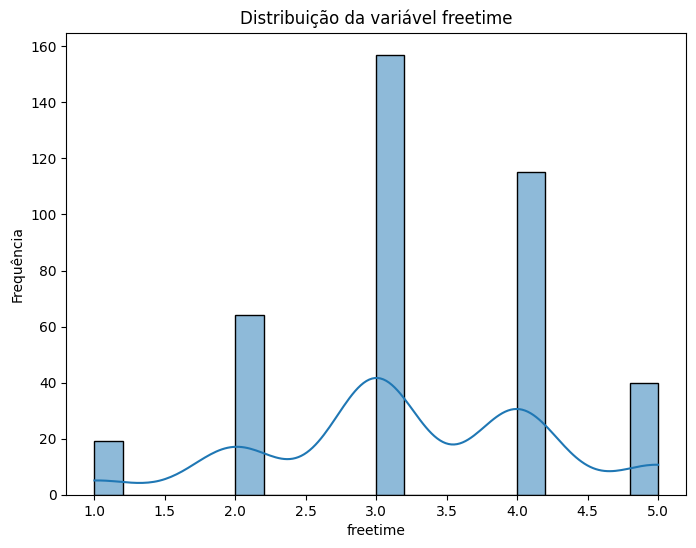

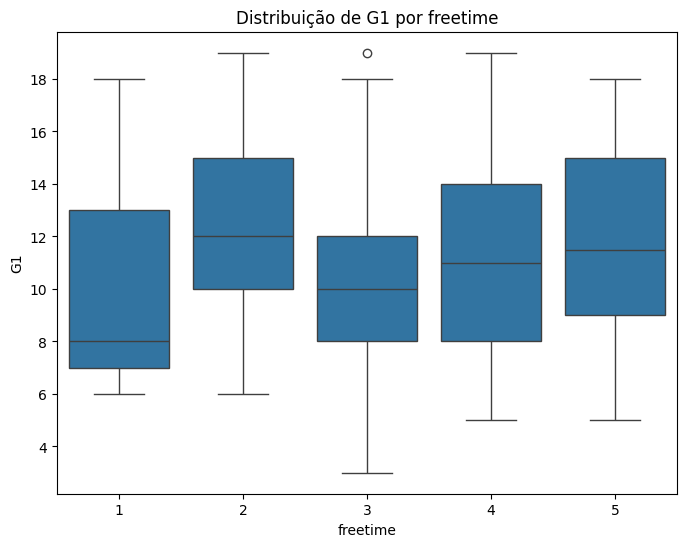

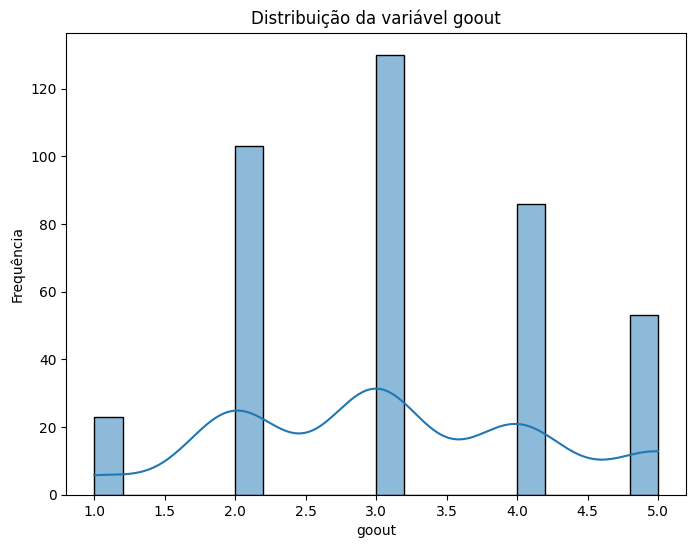

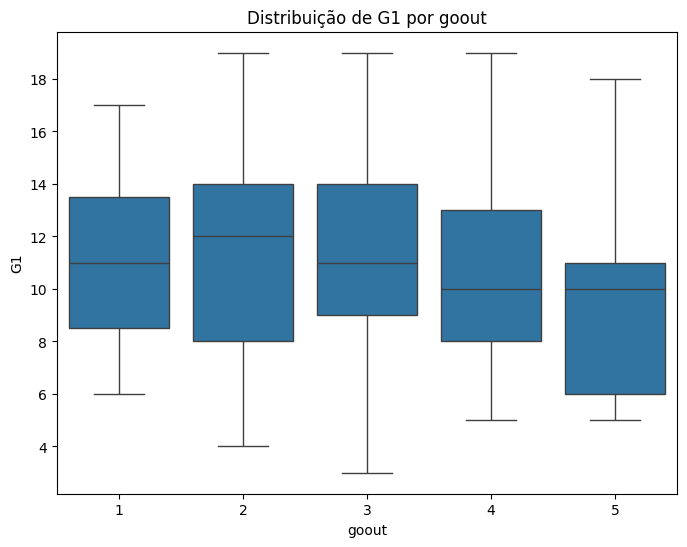

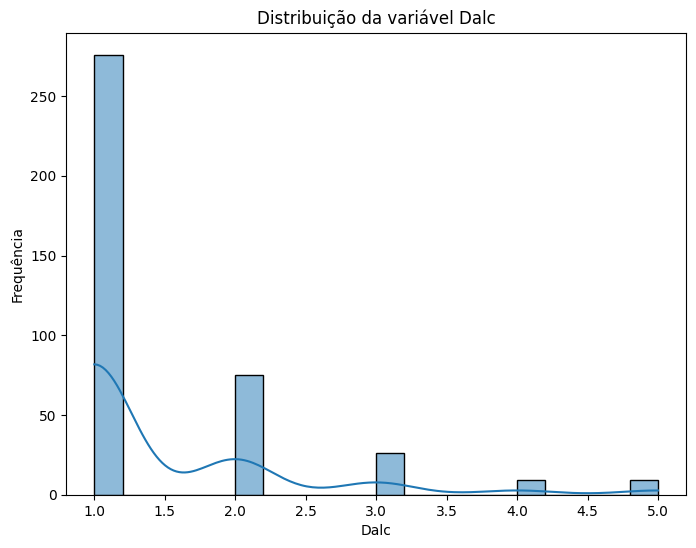

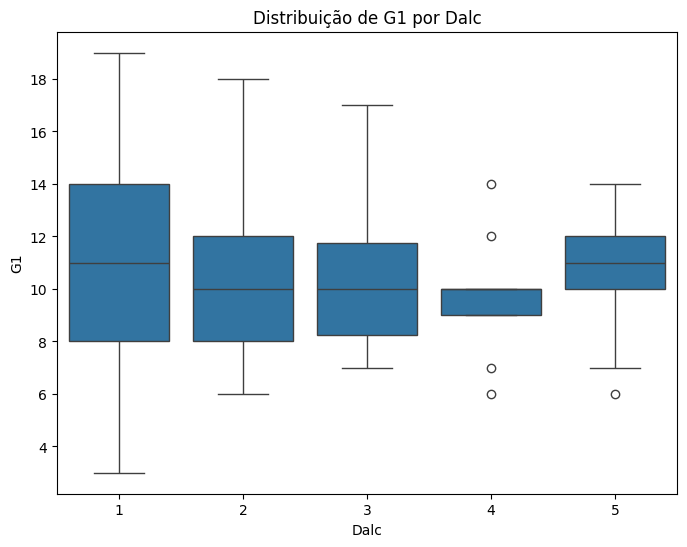

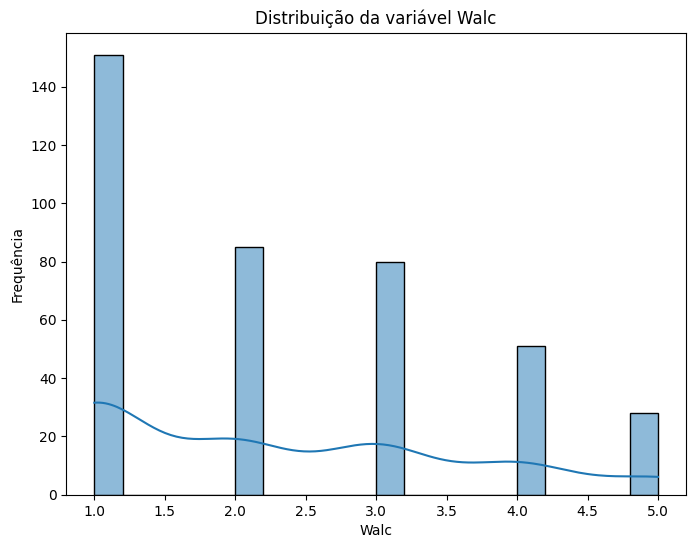

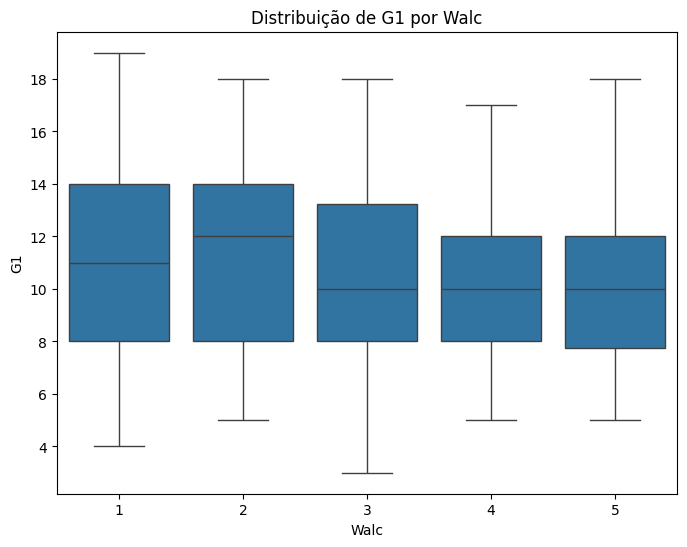

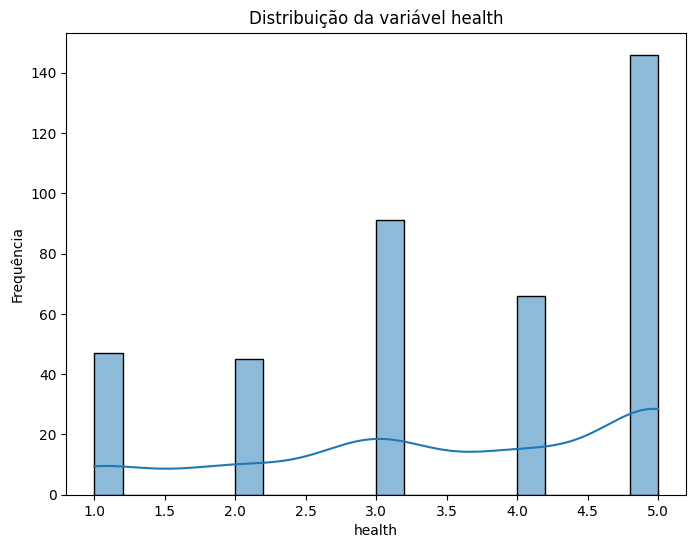

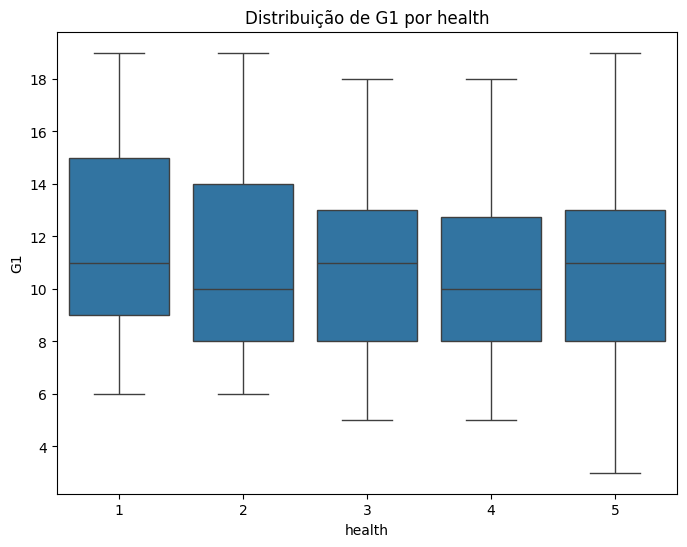

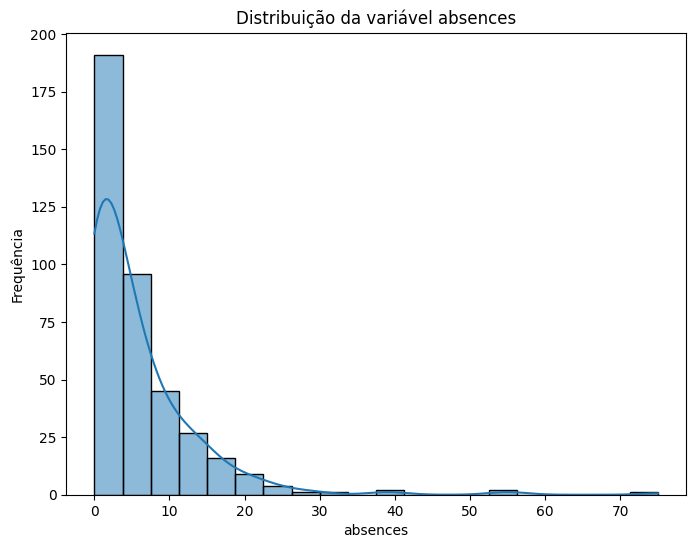

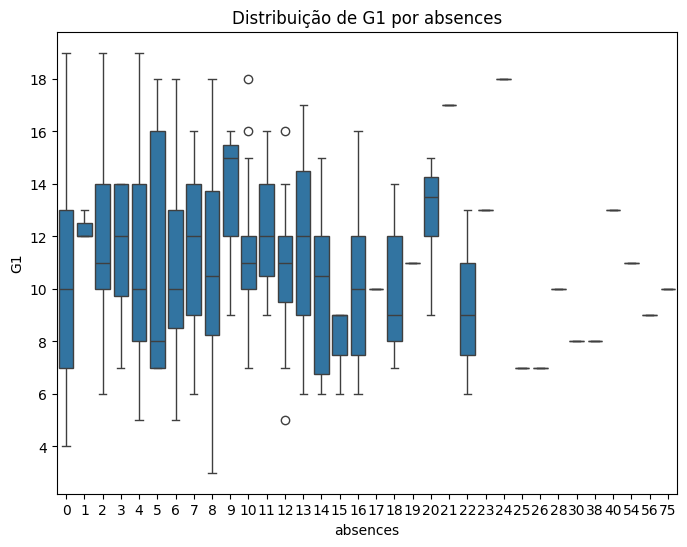

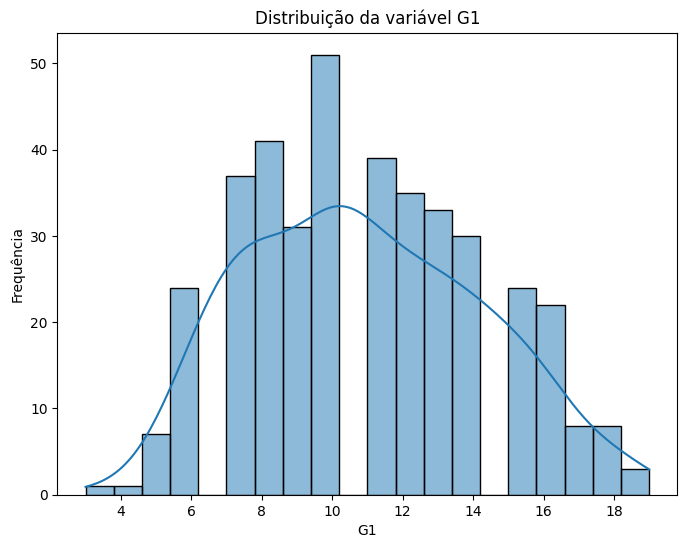

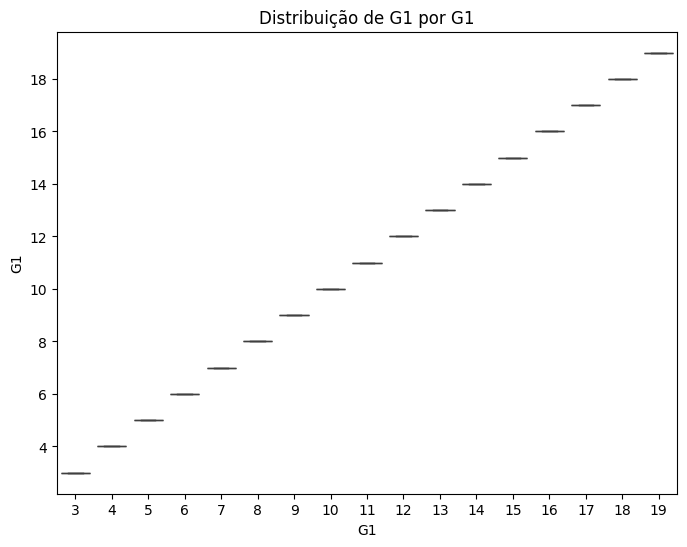

In [5]:
# Visualizing the distribution of numerical variables

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(["G2", "G3"])

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribuição da variável {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col], y=data['G1'])
    plt.title(f'Distribuição de G1 por {col}')
    plt.xlabel(col)
    plt.ylabel('G1')
    plt.show()

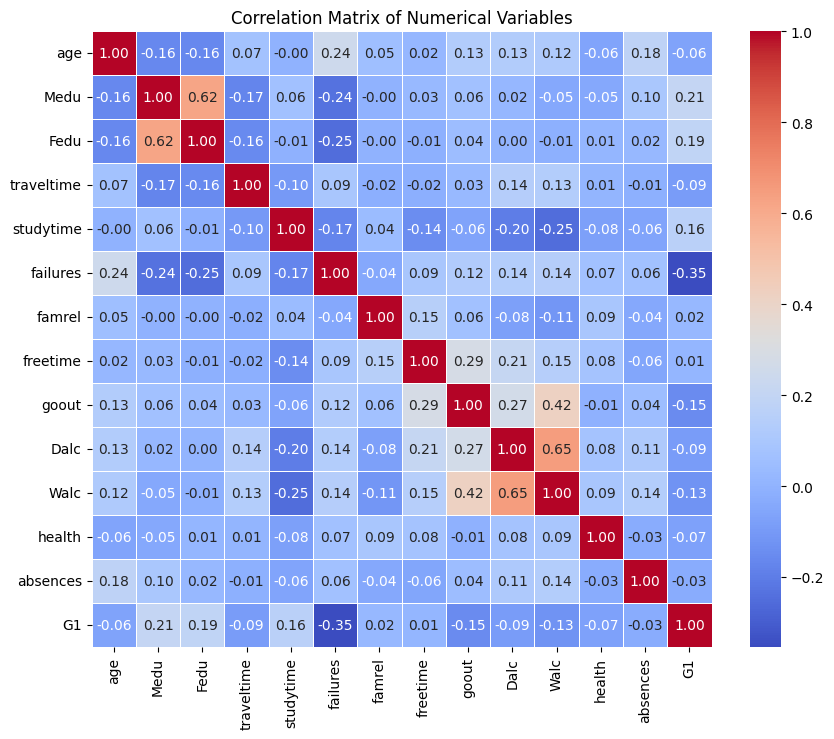

In [6]:
# Calculating the correlation between numerical variables
corr_matrix = data[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


## 4. Data Preparation
Now, let's prepare the data. The preparation includes handling missing data, encoding categorical variables, and splitting the data into training and testing sets.

In [7]:
# Check for missing values
print(data.isnull().sum())

# Separating the data into independent variables (X) and the dependent variable (y)
X = data.drop(['G1', 'G2', 'G3'], axis=1)
y = data['G1']

# Convert categorical variables to numerical using pd.get_dummies
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


## 5. Model Selection and Training

Now, let's train our model using Random Forest.

In [8]:
# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict with test data
y_pred = model.predict(X_test_scaled)

# Display some predictions
print('Predictions for the first 5 examples', y_pred[:5])


Predictions for the first 5 examples [ 6.58 10.15 10.11 11.59  9.38]


## 6. Model Evaluation and Fine-Tuning

In [9]:
# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R²): {r2}")

Mean Absolute Error (MAE): 2.8067088607594934
Mean Squared Error (MSE): 10.661684810126582
Root Mean Squared Error (RMSE): 3.2652235467310016
Coefficient of Determination (R²): 0.22022717269019854


In [10]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],   # Maximum depth
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be a leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Strategy to select features
}

# Configure the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Train the model with GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameter combination
print("Best parameters:", grid_search.best_params_)

# Best trained model
best_model = grid_search.best_estimator_

# Evaluate the optimized model on test data
y_pred_optimized = best_model.predict(X_test_scaled)

# Evaluate the performance of the optimized model
mae = mean_absolute_error(y_test, y_pred_optimized)
mse = mean_squared_error(y_test, y_pred_optimized)
rmse = root_mean_squared_error(y_test, y_pred_optimized)
r2 = r2_score(y_test, y_pred_optimized)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R²): {r2}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Windows 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
233 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Windows 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Windows 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Windows 10\AppData\Local\Programs\Python\Python312\Lib\site-

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Absolute Error (MAE): 2.757569875942834
Mean Squared Error (MSE): 10.54477527928151
Root Mean Squared Error (RMSE): 3.247271974947819
Coefficient of Determination (R²): 0.22877768576857604


## 7. Present Your Solution

Now, let's present the results. We can display the model's accuracy and analyze the key metrics.

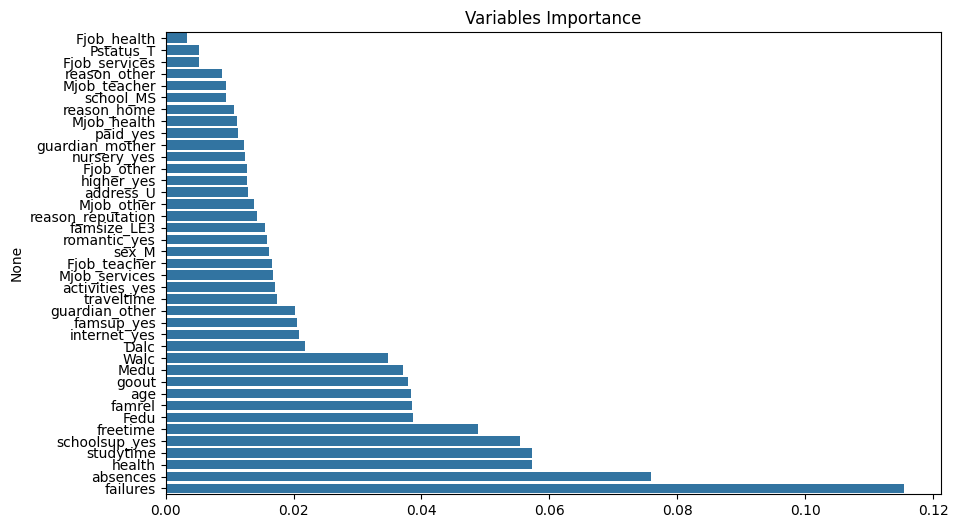

In [11]:
# Displaying the importance of variables
importances = model.feature_importances_
indices = X.columns

# Organize by importance
sorted_indices = indices[importances.argsort()]

# Plotting the importances
plt.figure(figsize=(10,6))
sns.barplot(x=importances[importances.argsort()], y=sorted_indices)
plt.title('Variables Importance')
plt.show()


## 8. Model Operationalization - Launch, Monitor, and Maintain Your System

The model is ready, but it should be regularly monitored. If necessary, it can be adjusted with new data or in response to new performance metrics.

In [13]:
# Predictions for new data
new_data = X_test_scaled[0:5]
predictions = model.predict(new_data)

# Displaying predictions for the first 5 examples
print("New Data Predictions:", predictions)

New Data Predictions: [ 6.58 10.15 10.11 11.59  9.38]
